In [1]:
import pandas as pd # Trabajos con datasets
import numpy as np # Funciones matemáticas
import matplotlib.pyplot as plt #Gráficos sencillos

### Analisis Exploratorio

7 etapas para un análisis exploratorio
    
1. Clarificar la pregunta o preguntas a responder
2. Tener una idea general del dataset o datasets
3. Verificar los tipos de datos que tenemos
4. Elegir estadísticas descriptivas para los datos
5. Visualizar datos
6. Analizar posibles interacciones entre variables
7. Extraer algunas conclusiones y eventualmente dar líneas directoras para un análisis más profundo

In [2]:
Banco=pd.read_csv('bank.csv',sep=";")
Banco.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


#### 1. Discutir con los requerimientos del análisis solicitado, para formular preguntas a responder con el dataset

1. Porcentaje de personas que usan telefono fijo en vez de celular
2. Clasificación, número y porcentaje de personas de acuerdo a trabajo
3. Relación el tipo de trabajo y educación, y si han abierto un depósito en el banco
4. Relación si tienen credito hipotecario o personal con el depósito en el banco
5. Relación entre el último contacto y el depósito en el banco (promedio)
6. Relación de apuerta de cuentas por bloques de edades

#### 2. Mirar en detalle el dataset: ¿Se debe realizar etapas de limpieza, variables dummy u otros? ¿Se puede trabajar con él? 

In [3]:
Banco[Banco.previous!=0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
21,39,technician,divorced,high.school,no,no,no,cellular,mar,mon,...,1,12,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes
27,28,blue-collar,married,basic.6y,unknown,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
30,38,technician,married,university.degree,no,yes,yes,cellular,mar,tue,...,1,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088,47,management,married,university.degree,no,yes,no,cellular,sep,mon,...,1,3,2,success,-3.4,92.379,-29.8,0.771,5017.5,yes
4089,25,admin.,single,university.degree,no,yes,yes,cellular,oct,fri,...,1,999,1,failure,-3.4,92.431,-26.9,0.739,5017.5,yes
4094,62,blue-collar,married,basic.4y,no,yes,no,cellular,nov,mon,...,1,6,1,success,-3.4,92.649,-30.1,0.719,5017.5,no
4111,30,technician,married,university.degree,no,no,yes,cellular,jun,fri,...,1,999,1,failure,-1.7,94.055,-39.8,0.748,4991.6,no


In [4]:
Banco.shape

(4119, 21)

In [5]:
Banco.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
columnas=Banco.columns
DatosFaltantes=Banco.isna().sum()
DatosFaltantes

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
Banco.job.unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [8]:
Banco.education.unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [9]:
Banco.contact.unique()

array(['cellular', 'telephone'], dtype=object)

In [10]:
Banco.contact[Banco.contact=='cellular'].count(),Banco.contact[Banco.contact=='telephone'].count()

(2652, 1467)

Las variables categóricas están bien definidas para sacar las conclusiones que deseamos

Reducir columnas

In [11]:
Banco.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [12]:
columnas

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
columnasSeleccionadas=['age', 'job', 'marital', 'education', 'default','contact', 'duration',
                        'pdays','previous', 'y']

In [14]:
Banco2=Banco[columnasSeleccionadas]
Banco2.head()

,age,job,marital,education,default,contact,duration,pdays,previous,y
0,30,blue-collar,married,basic.9y,no,cellular,487,999,0,no
1,39,services,single,high.school,no,telephone,346,999,0,no
2,25,services,married,high.school,no,telephone,227,999,0,no
3,38,services,married,basic.9y,no,telephone,17,999,0,no
4,47,admin.,married,university.degree,no,cellular,58,999,0,no


In [15]:
DummyHipo=pd.get_dummies(Banco.housing)
DummyPers=pd.get_dummies(Banco.loan)

In [16]:
def CreacionHipoteca(BH1,BH2):
    if (len(BH1)!=len(BH2)):
        print("No se puede realizar la acción, las bases de datos están de tamaños distintos")
    else:
        n=len(BH1)
        Salida=np.zeros(n)
        for i in range(n):
            if BH1.yes[i]==1:
                Salida[i]=1
            elif BH1.unknown[i]==1:
                if BH2.yes[i]==1:
                    Salida[i]=1
                else:
                    Salida[i]=-1
            else:
                if BH2.yes[i]==1:
                    Salida[i]=1
                elif BH2.unknown[i]==1:
                    Salida[i]=-1
    return Salida

In [17]:
Banco2['Hipoteca']=CreacionHipoteca(DummyHipo,DummyPers)
Banco2.head()

C:\Users\Nicole\AppData\Local\Temp\ipykernel_20352\3139025699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Banco2['Hipoteca']=CreacionHipoteca(DummyHipo,DummyPers)


,age,job,marital,education,default,contact,duration,pdays,previous,y,Hipoteca
0,30,blue-collar,married,basic.9y,no,cellular,487,999,0,no,1.0
1,39,services,single,high.school,no,telephone,346,999,0,no,0.0
2,25,services,married,high.school,no,telephone,227,999,0,no,1.0
3,38,services,married,basic.9y,no,telephone,17,999,0,no,-1.0
4,47,admin.,married,university.degree,no,cellular,58,999,0,no,1.0


In [18]:
DummyHipo.iloc[:,0]

0       0
1       1
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    1
4117    1
4118    0
Name: no, Length: 4119, dtype: uint8

In [19]:
Banco.housing[Banco.housing=='unknown'].count()

105

#### 3. Una vez el dataset está limpio y se tienen los objetivos, verificar las variables, longitud del dataset, tipos de variables (categóricas o cuantitativas), realizar variables dummy si es necesario y que las variables cuantitativas estén en string

In [20]:
Banco2.dtypes

age            int64
job           object
marital       object
education     object
default       object
contact       object
duration       int64
pdays          int64
previous       int64
y             object
Hipoteca     float64
dtype: object

In [21]:
temp=pd.get_dummies(Banco2.default)
temp2=pd.get_dummies(Banco2.y)
temp

,no,unknown,yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
4114,1,0,0
4115,1,0,0
4116,1,0,0
4117,1,0,0


In [22]:
temp2

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
4114,1,0
4115,1,0
4116,1,0
4117,1,0


In [23]:
Banco2=Banco2.drop(['default','y'],axis=1)
Banco2=pd.concat([Banco2,temp.iloc[:,0],temp2.iloc[:,0]],axis=1)
Banco2.head()

,age,job,marital,education,contact,duration,pdays,previous,Hipoteca,no,no
0,30,blue-collar,married,basic.9y,cellular,487,999,0,1.0,1,1
1,39,services,single,high.school,telephone,346,999,0,0.0,1,1
2,25,services,married,high.school,telephone,227,999,0,1.0,1,1
3,38,services,married,basic.9y,telephone,17,999,0,-1.0,1,1
4,47,admin.,married,university.degree,cellular,58,999,0,1.0,1,1


In [24]:
Banco2.columns

Index(['age', 'job', 'marital', 'education', 'contact', 'duration', 'pdays',
       'previous', 'Hipoteca', 'no', 'no'],
      dtype='object')

In [25]:
Banco2.columns=['age', 'job', 'marital', 'education', 'contact','duration', 'pdays', 'previous',
       'Hipoteca', 'default', 'y']

In [26]:
Banco2.head()

,age,job,marital,education,contact,duration,pdays,previous,Hipoteca,default,y
0,30,blue-collar,married,basic.9y,cellular,487,999,0,1.0,1,1
1,39,services,single,high.school,telephone,346,999,0,0.0,1,1
2,25,services,married,high.school,telephone,227,999,0,1.0,1,1
3,38,services,married,basic.9y,telephone,17,999,0,-1.0,1,1
4,47,admin.,married,university.degree,cellular,58,999,0,1.0,1,1


In [27]:
Banco2.loc[:,'default']=1-Banco2.loc[:,'default']
Banco2.loc[:,'y']=1-Banco2.loc[:,'y']
Banco2.head(20)

,age,job,marital,education,contact,duration,pdays,previous,Hipoteca,default,y
0,30,blue-collar,married,basic.9y,cellular,487,999,0,1.0,0,0
1,39,services,single,high.school,telephone,346,999,0,0.0,0,0
2,25,services,married,high.school,telephone,227,999,0,1.0,0,0
3,38,services,married,basic.9y,telephone,17,999,0,-1.0,0,0
4,47,admin.,married,university.degree,cellular,58,999,0,1.0,0,0
5,32,services,single,university.degree,cellular,128,999,2,0.0,0,0
6,32,admin.,single,university.degree,cellular,290,999,0,1.0,0,0
7,41,entrepreneur,married,university.degree,cellular,44,999,0,1.0,1,0
8,31,services,divorced,professional.course,cellular,68,999,1,0.0,0,0
9,35,blue-collar,married,basic.9y,telephone,170,999,0,0.0,1,0


#### 4. Realizar estadísticas con las variables

1. Porcentaje de personas que usan telefono fijo en vez de celular
2. Clasificación, número y porcentaje de personas de acuerdo a trabajo
3. Relación el tipo de trabajo y educación, y si han abierto un depósito en el banco
4. Relación si tienen credito hipotecario o personal con el depósito en el banco
5. Relación entre el último contacto y el depósito en el banco (promedio)
6. Relación de apuerta de cuentas por bloques de edades

In [28]:
Banco2.contact[Banco2.contact=='cellular'].count()/len(Banco2)

0.6438455935906774

In [29]:
1-Banco2.contact[Banco2.contact=='cellular'].count()/len(Banco2)

0.3561544064093226

4.1. Existe 64,38% de personas que utlizan el celular en vez del telefono fijo para contacto

In [30]:
Agrupa1=Banco2.groupby('job')
countJob=Agrupa1[['age']].count()
countJob

,age
job,
admin.,1012
blue-collar,884
entrepreneur,148
housemaid,110
management,324
retired,166
self-employed,159
services,393
student,82


In [31]:
countJob.index

Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object', name='job')

In [32]:
countJobNums=countJob['age'].array
countJobNums

<PandasArray>
[1012, 884, 148, 110, 324, 166, 159, 393, 82, 691, 111, 39]
Length: 12, dtype: int64

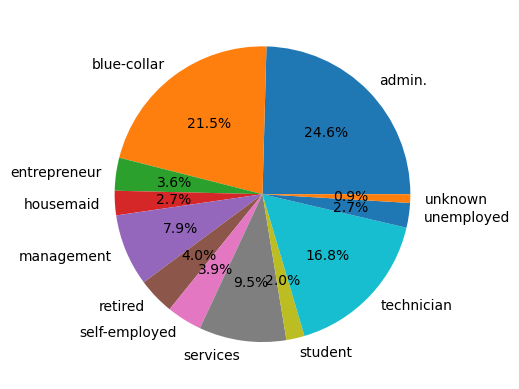

In [33]:
plt.pie(countJob['age'],labels=countJob.index,autopct='%1.1f%%')
plt.show()

4.2. Clasificación de personas de acuerdo al trabajo

In [34]:
Agrupa3=Banco2.groupby(['education'])
Agrupa3.y.sum()

education
basic.4y                38
basic.6y                17
basic.9y                43
high.school             97
illiterate               0
professional.course     65
university.degree      165
unknown                 26
Name: y, dtype: uint8

In [35]:
Agrupa2=Banco2.groupby(['job'])
Agrupa2.y.sum()

job
admin.           133
blue-collar       61
entrepreneur       8
housemaid         11
management        30
retired           38
self-employed     13
services          35
student           19
technician        80
unemployed        19
unknown            4
Name: y, dtype: uint8

In [36]:
Agrupa2.y.sum().sum(),Agrupa3.y.sum().sum()

(451, 451)

In [37]:
Agrupa2.y.sum()/Agrupa2.y.count()*100

job
admin.           13.142292
blue-collar       6.900452
entrepreneur      5.405405
housemaid        10.000000
management        9.259259
retired          22.891566
self-employed     8.176101
services          8.905852
student          23.170732
technician       11.577424
unemployed       17.117117
unknown          10.256410
Name: y, dtype: float64

In [38]:
Agrupa3.y.sum()/Agrupa3.y.count()*100

education
basic.4y                8.857809
basic.6y                7.456140
basic.9y                7.491289
high.school            10.532030
illiterate              0.000000
professional.course    12.149533
university.degree      13.053797
unknown                15.568862
Name: y, dtype: float64

4.3. Los estudiantes y retirados son los más propensos a abrir cuentas en el banco, así como los que tienen formación universitaria

In [39]:
Agrupa4=Banco2.groupby(['Hipoteca'])

In [40]:
Agrupa4.y.sum()/Agrupa4.y.count()*100

Hipoteca
-1.0     8.571429
 0.0    11.237374
 1.0    10.864198
Name: y, dtype: float64

4.4. Las personas con credito personal tienen una tendencia mayor a abrir cuentas en el banco que aquellas con credito de hipoteca o desconocido; con una probabilidad más o menos igual de apertura del 11% entre los que tienen hipoteca con los que tienen crédito propio

In [41]:
Agrupa5=Banco2.groupby(['previous'])
Agrupa5.y.sum()/Agrupa5.y.count()*100

previous
0      8.288391
1     20.842105
2     41.025641
3     60.000000
4     71.428571
5    100.000000
6     50.000000
Name: y, dtype: float64

In [42]:
Agrupa5_a=Banco2.groupby(pd.cut(Banco2['duration'],bins=7))
Agrupa5_a.y.sum()/Agrupa5_a.y.count()*100

duration
(-3.643, 520.429]         6.905022
(520.429, 1040.857]      38.043478
(1040.857, 1561.286]     67.123288
(1561.286, 2081.714]     60.000000
(2081.714, 2602.143]    100.000000
(2602.143, 3122.571]    100.000000
(3122.571, 3643.0]       50.000000
Name: y, dtype: float64

In [43]:
Agrupa5_b=Banco2.groupby(['previous'])
Agrupa5_b.y.mean()*100

previous
0      8.288391
1     20.842105
2     41.025641
3     60.000000
4     71.428571
5    100.000000
6     50.000000
Name: y, dtype: float64

4.5. (Nicole) Las personas con 3 a 5 contactos previos a la campaña tienen mayor tendencia a crear una cuenta en el banco, las de 5 siendo garantizada su entrada. Así mismo, aquellos que hicieron su último contacto de una duración de 2082 a 2602 a 3122 segundos aproximados tienen una tendencia garantizada a abrir un depósito en el banco, seguidos de los de contactos de 1040 a 1561 a 2081 segundos de duración.

(Erwin) A mayor número de contactos con el banco, mayor probabilidad de apertura de cuenta

In [44]:
maxAge=Banco2['age'].max()
minAge=Banco2['age'].min()
maxAge,minAge

(88, 18)

In [45]:
Agrupa6=Banco2.groupby(pd.cut(Banco2['age'],bins=7))
Agrupa6.y.sum()/Agrupa6.y.count()*100

age
(17.93, 28.0]    13.106796
(28.0, 38.0]     10.035419
(38.0, 48.0]      8.485401
(48.0, 58.0]     11.213720
(58.0, 68.0]     24.576271
(68.0, 78.0]     39.285714
(78.0, 88.0]     69.230769
Name: y, dtype: float64

In [46]:
agrupa7=Banco2.groupby(['previous','y'])
agrupa7.pdays.mean()

previous  y
0         0    999.000000
          1    999.000000
1         0    893.327128
          1    487.040404
2         0    740.152174
          1    285.625000
3         0    504.100000
          1     71.466667
4         0    506.000000
          1    105.600000
5         1      4.000000
6         0      3.000000
          1      3.000000
Name: pdays, dtype: float64

In [47]:
RangoEdades=[18+10*i for i in range(7)]
Edades=np.array([len(Banco2[(Banco2.age>18+10*i)&(Banco2.age<=18+10*(i+1))])for i in range(7)])
DepositosEdades=np.array([Banco2.y[(Banco2.age>18+10*i)&(Banco2.age<=18+10*(i+1))].sum() for i in range(7)])
pd.DataFrame({
    'Rango Edades':RangoEdades,
    'Porcentaje':DepositosEdades/Edades*100
})

,Rango Edades,Porcentaje
0,18,12.958435
1,28,10.035419
2,38,8.485401
3,48,11.213720
4,58,24.576271
5,68,39.285714
6,78,69.230769


4.6. Las personas en un rango de 79 a 88 años tienen mayor disposición a crear depósitos en el banco, junto a las de 68 a 78 años. Los grupos mayores a 58 años tienen mayores probabilidades de abrir una cuenta

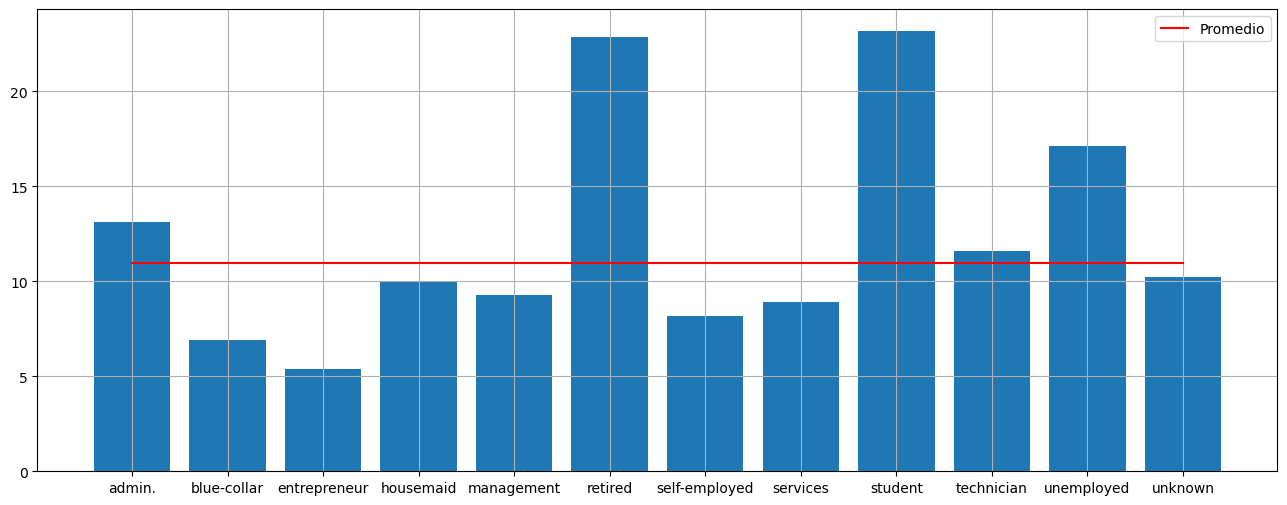

In [48]:
PorcentajeTrabajo=pd.DataFrame(Agrupa2.y.sum()/Agrupa2.y.count()*100)
plt.figure(figsize=(16,6))
plt.grid()
plt.bar(PorcentajeTrabajo.index,PorcentajeTrabajo.y)
Y=np.ones(len(PorcentajeTrabajo))*Banco2.y.mean()*100
plt.plot(PorcentajeTrabajo.index,Y,'r')
plt.legend(['Promedio'])
plt.show()

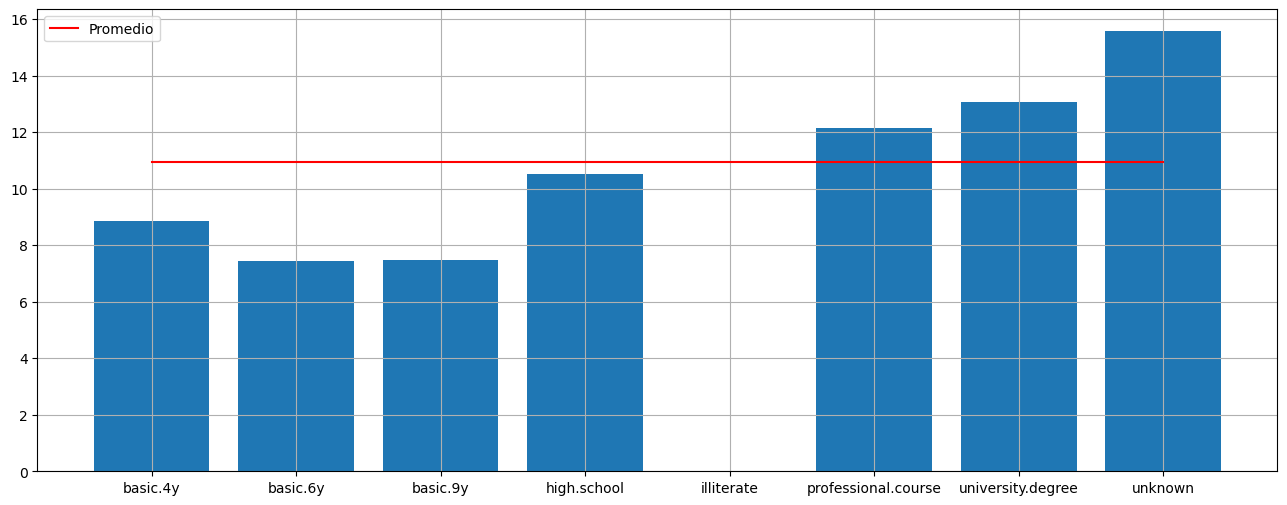

In [49]:
PorcentajeEducacion=pd.DataFrame(Agrupa3.y.sum()/Agrupa3.y.count()*100)
plt.figure(figsize=(16,6))
plt.grid()
plt.bar(PorcentajeEducacion.index,PorcentajeEducacion.y)
Y=np.ones(len(PorcentajeEducacion))*Banco2.y.mean()*100
plt.plot(PorcentajeEducacion.index,Y,'r')
plt.legend(['Promedio'])
plt.show()

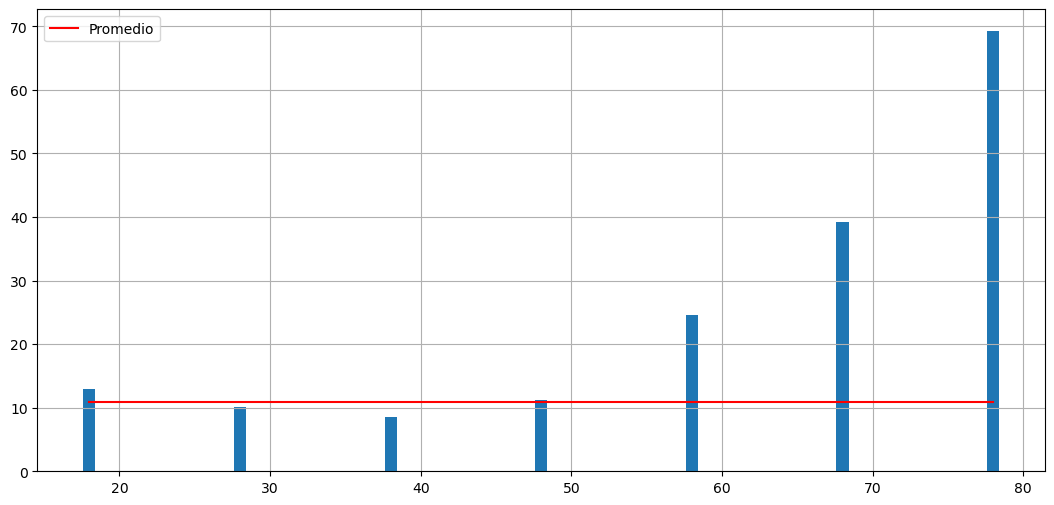

In [50]:
PorcentajeEdades=pd.DataFrame({
    'Rango Edades':RangoEdades,
    'Porcentaje':DepositosEdades/Edades*100
})
plt.figure(figsize=(13,6))
plt.grid()
plt.bar(PorcentajeEdades["Rango Edades"],PorcentajeEdades.Porcentaje)
Y=np.ones(len(PorcentajeEdades.Porcentaje))*Banco2.y.mean()*100
plt.plot(PorcentajeEdades["Rango Edades"],Y,'r')
plt.legend(['Promedio'])
plt.show()

#### 6. Realizar gráficas para ver las relaciones entre las variables (plot, nubes de puntos, etc)

In [51]:
Banco2.corr()

,age,duration,pdays,previous,Hipoteca,default,y
age,1.000000,0.041299,-0.043425,0.050931,-0.004112,0.161427,0.060374
duration,0.041299,1.000000,-0.046998,0.025724,-0.018922,-0.020140,0.418565
pdays,-0.043425,-0.046998,1.000000,-0.587941,-0.017733,0.089514,-0.332012
previous,0.050931,0.025724,-0.587941,1.000000,0.009431,-0.092754,0.255697
Hipoteca,-0.004112,-0.018922,-0.017733,0.009431,1.000000,-0.008796,0.000613
default,0.161427,-0.020140,0.089514,-0.092754,-0.008796,1.000000,-0.076567
y,0.060374,0.418565,-0.332012,0.255697,0.000613,-0.076567,1.000000


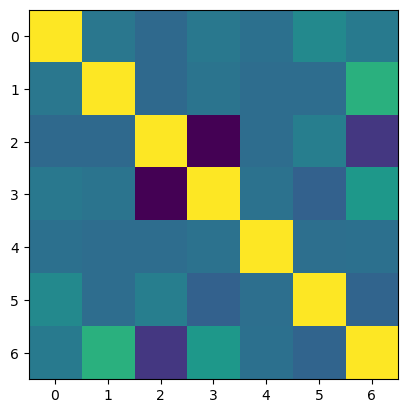

In [52]:
plt.imshow(Banco2.corr())
plt.show()

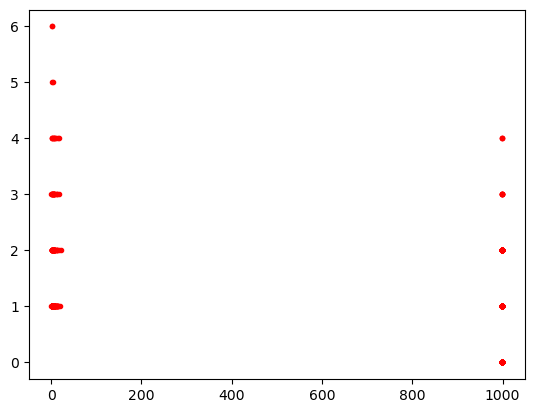

In [53]:
plt.plot(Banco2.pdays,Banco2.previous,'r.')
plt.show()

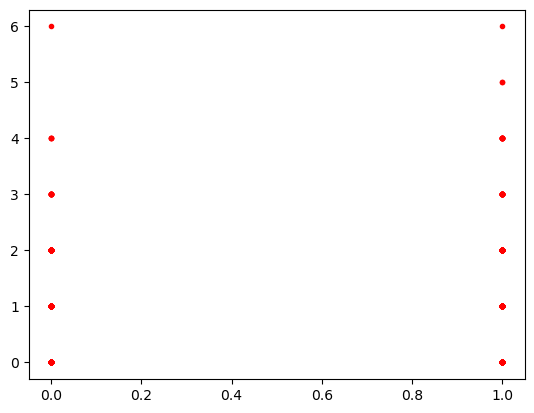

In [54]:
plt.plot(Banco2.y,Banco2.previous,'r.')
plt.show()

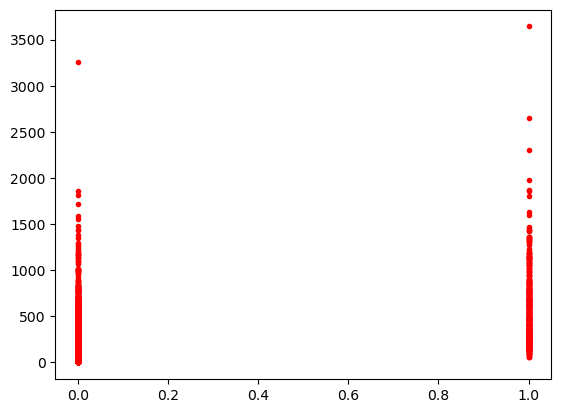

In [55]:
plt.plot(Banco2.y,Banco2.duration,'r.')
plt.show()

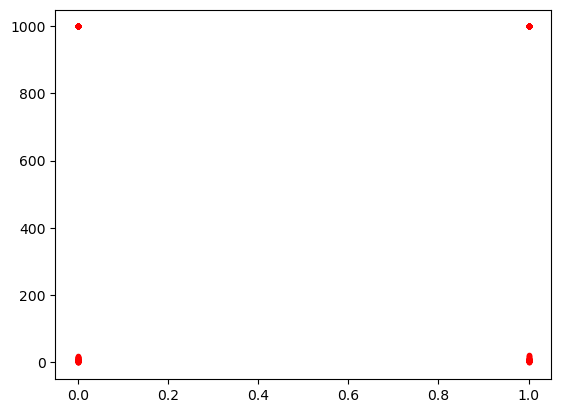

In [56]:
plt.plot(Banco2.y,Banco2.pdays,'r.')
plt.show()

#### 7. En función de lo visto anteriormente y con las preguntas en mente, sacar conclusiones y recomendaciones

Hemos visto la relación que existe entre las diversas variables categóricas y la probabilidad de apertura de cuenta en el banco

Se ha determinado que existe una probabilidad del 11% de apertura de cuenta en las campañas donde los grupos de mayor recepción son los grupos de estudiantes, retirados y desempleados mayores a 58 y con formación profesional o universitaria

Por otro lado, se puede ver que a mayor contacto con el cliente es mayor la probablidad de apertura de cuenta y que no van a pasar demasiados días entre el contacto y una apertura de cuenta, reduciendo aproximadamente de 400 dias a 200 o 100 a mayor número de contactos. Los contactos realizados duran máximo 2000 segundos lo que estima una comunicación simple